# Rappel des consignes
Utilisez les données du FINESS pour étudier:

1. La répartition, dans l'export de 2024, du nombre d'établissement par catégorie
2. Mesurer l'évolution, entre 2018 et 2024 du nombre d'établissements enregistrés dans le FINESS.
3. Établir une carte des "Centres Hospitaliers Régionaux" (catégorie `1101`) en France.
 
# Introduction
On consulte la documentation "Description du jeu de données".
On déduit que les informations dans "Extraction Finess des Etablissements" sont comprises dans "Extraction Finess des Etablissements géolocalisés ".

In [1]:
# Téléchargement des données
#!wget -O etalab_cs1100507.csv https://www.data.gouv.fr/fr/datasets/r/98f3161f-79ff-4f16-8f6a-6d571a80fea2
#!wget -O etalab_cs1100502.csv https://www.data.gouv.fr/fr/datasets/r/2ce43ade-8d2c-4d1d-81da-ca06c82abc68

In [2]:
# Libraries à importer
import pandas as pd
import plotly.express as px

# Exploration donnée

## Compréhension du fichier
On consulte la documentation "Description du jeu de données".
Les établissements devraient avoir 32 colonnes
* Section;
* Numéro FINESS ET;
* Numéro FINESS EJ;
* Raison sociale;
* ...
* Date d’autorisation;
* Date de mise à jour sur la structure;
* Numéro éducation nationale"

In [3]:
cols_etablissements = ['Section',
 'Numéro FINESS ET',
 'Numéro FINESS EJ',
 'Raison sociale',
 'Raison sociale longue',
 'Complément de raison sociale',
 'Complément de distribution',
 'Numéro de voie',
 'Type de voie',
 'Libellé de voie',
 'Complément de voie',
 'Lieu-dit / BP',
 'Code Commune',
 'Département',
 'Libellé département',
 'Ligne d’acheminement (CodePostal+Lib commune)',
 'Téléphone',
 'Télécopie',
 'Catégorie d’établissement',
 'Libelle catégorie d’établissement',
 'Catégorie d’agrégat d’établissement',
 'Libellé catégorie d’agrégat d’établissement',
 'Numéro de SIRET',
 'Code APE',
 'Code MFT',
 'Libelle MFT',
 'Code SPH',
 'Libelle SPH',
 'Date d’ouverture',
 'Date d’autorisation',
 'Date de mise à jour sur la structure',
 'Numéro éducation nationale']

cols_geolocalisation=['Numéro FINESS ET', 'Coordonnées X', 'Coordonnées Y', 'Source des coordonnées', 'Date de mise à jour des coordonnées']

In [4]:
df = pd.read_csv("etalab_cs1100502.csv", sep=";")
print(df.shape)
print(df.columns)
df.head()

/tmp/ipykernel_202/758026996.py:1: DtypeWarning: Columns (1,2,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("etalab_cs1100502.csv", sep=";")


(99489, 4)
Index(['finess', 'etalab', '82', '2024-03-19'], dtype='object')


finess  \
structureet 10000024 10780054 CH DE FLEYRIAT              CENTRE HOSPITALIER DE BOURG-EN-BRESSE FLEYRIAT NaN NaN 900.0 RTE DE PARIS         NaN NaN    451 1 AIN 01440 VIRIAT        474454647.0 474454114.0 355 Centre Hospitalier (C.H.)            1102 Centres Hospitaliers 2.601000e+13 8610Z 3 ARS établissements Publics de santé dotation gl... 1.0 Etablissement public de santé  1979-02-13   
            10000032 10780062 CH BUGEY SUD                CENTRE HOSPITALIER BUGEY SUD                   NaN NaN 700.0 AV  DE NARVIK        NaN BP 139 34  1 AIN 01300 BELLEY        479425959.0 479425996.0 355 Centre Hospitalier (C.H.)            1102 Centres Hospitaliers 2.601000e+13 8610Z 3 ARS établissements Publics de santé dotation gl... 1.0 Etablissement public de santé  1901-01-01   
            10000065 10780096 CH DE TREVOUX - MONTPENSIER CENTRE HOSPITALIER DE TREVOUX - MONTPENSIER    NaN NaN 14.0  R   DE L'HOPITAL     NaN BP 615 427 1 AIN 01606 TREVOUX CEDEX 474105000.0 474105019.0 355 Centre Hospitalier (C.H.)            1102 Centres Hospitaliers 2.601003e+13 8610Z 3 ARS établissements Publics de santé dotation gl... 1.0 Etablissement public de santé  1901-01-01   
            10000081 10780112 CH DU PAYS DE GEX           CENTRE HOSPITALIER DU PAYS DE GEX              NaN NaN 160.0 R   MARC PANISSOD    NaN BP 437 173 1 AIN 01174 GEX CEDEX     450403838.0 450403825.0 106 Centre hospitalier, ex Hôpital local 1106 Hôpitaux Locaux      2.601001e+13 8610Z 3 ARS établissements Publics de santé dotation gl... 1.0 Etablissement public de santé  1901-01-01   
            10000099 10780120 CH DE MEXIMIEUX             CENTRE HOSPITALIER DE MEXIMIEUX                NaN NaN 13.0  AV  DU DOCTEUR BOYER NaN NaN    244 1 AIN 01800 MEXIMIEUX     474610177.0 474347184.0 106 Centre hospitalier, ex Hôpital local 1106 Hôpitaux Locaux      2.601001e+13 8610Z 3 ARS établissements Publics de santé dotation gl... 1.0 Etablissement public de santé  1945-01-01   

                                                                                                                                                                                                                                                                                                                                                                                               etalab  \
structureet 10000024 10780054 CH DE FLEYRIAT              CENTRE HOSPITALIER DE BOURG-EN-BRESSE FLEYRIAT NaN NaN 900.0 RTE DE PARIS         NaN NaN    451 1 AIN 01440 VIRIAT        474454647.0 474454114.0 355 Centre Hospitalier (C.H.)            1102 Centres Hospitaliers 2.601000e+13 8610Z 3 ARS établissements Publics de santé dotation gl... 1.0 Etablissement public de santé  1979-02-13   
            10000032 10780062 CH BUGEY SUD                CENTRE HOSPITALIER BUGEY SUD                   NaN NaN 700.0 AV  DE NARVIK        NaN BP 139 34  1 AIN 01300 BELLEY        479425959.0 479425996.0 355 Centre Hospitalier (C.H.)            1102 Centres Hospitaliers 2.601000e+13 8610Z 3 ARS établissements Publics de santé dotation gl... 1.0 Etablissement public de santé  1901-01-01   
            10000065 10780096 CH DE TREVOUX - MONTPENSIER CENTRE HOSPITALIER DE TREVOUX - MONTPENSIER    NaN NaN 14.0  R   DE L'HOPITAL     NaN BP 615 427 1 AIN 01606 TREVOUX CEDEX 474105000.0 474105019.0 355 Centre Hospitalier (C.H.)            1102 Centres Hospitaliers 2.601003e+13 8610Z 3 ARS établissements Publics de santé dotation gl... 1.0 Etablissement public de santé  1901-01-01   
            10000081 10780112 CH DU PAYS DE GEX           CENTRE HOSPITALIER DU PAYS DE GEX              NaN NaN 160.0 R   MARC PANISSOD    NaN BP 437 173 1 AIN 01174 GEX CEDEX     450403838.0 450403825.0 106 Centre hospitalier, ex Hôpital local 1106 Hôpitaux Locaux      2.601001e+13 8610Z 3 ARS établissements Publics de santé dotation gl... 1.0 Etablissement public de santé  1901-01-01   
            10000099 10780120 CH DE MEXIMIEUX             C

In [5]:
df = pd.read_csv("etalab_cs1100507.csv", sep=";")
print(df.shape)
print(df.columns)
df.head()

/tmp/ipykernel_202/3162589561.py:1: DtypeWarning: Columns (1,2,3,6,8,9,10,11,13,14,15,19,21,23,25,27,28,29,30,31) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("etalab_cs1100507.csv", sep=";")


(196442, 4)
Index(['finess', 'etalab', '69', '2024-03-19'], dtype='object')


finess  \
structureet 10000024 10780054 CH DE FLEYRIAT              CENTRE HOSPITALIER DE BOURG-EN-BRESSE FLEYRIAT NaN NaN 900.0 RTE DE PARIS         NaN NaN    451.0 1 AIN 01440 VIRIAT        474454647.0 474454114.0 355.0 Centre Hospitalier (C.H.)            1102.0 Centres Hospitaliers 2.601000e+13 8610Z 3.0 ARS établissements Publics de santé dotation gl... 1.0 Etablissement public de santé  1979-02-13   
            10000032 10780062 CH BUGEY SUD                CENTRE HOSPITALIER BUGEY SUD                   NaN NaN 700.0 AV  DE NARVIK        NaN BP 139 34.0  1 AIN 01300 BELLEY        479425959.0 479425996.0 355.0 Centre Hospitalier (C.H.)            1102.0 Centres Hospitaliers 2.601000e+13 8610Z 3.0 ARS établissements Publics de santé dotation gl... 1.0 Etablissement public de santé  1901-01-01   
            10000065 10780096 CH DE TREVOUX - MONTPENSIER CENTRE HOSPITALIER DE TREVOUX - MONTPENSIER    NaN NaN 14.0  R   DE L'HOPITAL     NaN BP 615 427.0 1 AIN 01606 TREVOUX CEDEX 474105000.0 474105019.0 355.0 Centre Hospitalier (C.H.)            1102.0 Centres Hospitaliers 2.601003e+13 8610Z 3.0 ARS établissements Publics de santé dotation gl... 1.0 Etablissement public de santé  1901-01-01   
            10000081 10780112 CH DU PAYS DE GEX           CENTRE HOSPITALIER DU PAYS DE GEX              NaN NaN 160.0 R   MARC PANISSOD    NaN BP 437 173.0 1 AIN 01174 GEX CEDEX     450403838.0 450403825.0 106.0 Centre hospitalier, ex Hôpital local 1106.0 Hôpitaux Locaux      2.601001e+13 8610Z 3.0 ARS établissements Publics de santé dotation gl... 1.0 Etablissement public de santé  1901-01-01   
            10000099 10780120 CH DE MEXIMIEUX             CENTRE HOSPITALIER DE MEXIMIEUX                NaN NaN 13.0  AV  DU DOCTEUR BOYER NaN NaN    244.0 1 AIN 01800 MEXIMIEUX     474610177.0 474347184.0 106.0 Centre hospitalier, ex Hôpital local 1106.0 Hôpitaux Locaux      2.601001e+13 8610Z 3.0 ARS établissements Publics de santé dotation gl... 1.0 Etablissement public de santé  1945-01-01   

                                                                                                                                                                                                                                                                                                                                                                                                       etalab  \
structureet 10000024 10780054 CH DE FLEYRIAT              CENTRE HOSPITALIER DE BOURG-EN-BRESSE FLEYRIAT NaN NaN 900.0 RTE DE PARIS         NaN NaN    451.0 1 AIN 01440 VIRIAT        474454647.0 474454114.0 355.0 Centre Hospitalier (C.H.)            1102.0 Centres Hospitaliers 2.601000e+13 8610Z 3.0 ARS établissements Publics de santé dotation gl... 1.0 Etablissement public de santé  1979-02-13   
            10000032 10780062 CH BUGEY SUD                CENTRE HOSPITALIER BUGEY SUD                   NaN NaN 700.0 AV  DE NARVIK        NaN BP 139 34.0  1 AIN 01300 BELLEY        479425959.0 479425996.0 355.0 Centre Hospitalier (C.H.)            1102.0 Centres Hospitaliers 2.601000e+13 8610Z 3.0 ARS établissements Publics de santé dotation gl... 1.0 Etablissement public de santé  1901-01-01   
            10000065 10780096 CH DE TREVOUX - MONTPENSIER CENTRE HOSPITALIER DE TREVOUX - MONTPENSIER    NaN NaN 14.0  R   DE L'HOPITAL     NaN BP 615 427.0 1 AIN 01606 TREVOUX CEDEX 474105000.0 474105019.0 355.0 Centre Hospitalier (C.H.)            1102.0 Centres Hospitaliers 2.601003e+13 8610Z 3.0 ARS établissements Publics de santé dotation gl... 1.0 Etablissement public de santé  1901-01-01   
            10000081 10780112 CH DU PAYS DE GEX           CENTRE HOSPITALIER DU PAYS DE GEX              NaN NaN 160.0 R   MARC PANISSOD    NaN BP 437 173.0 1 AIN 01174 GEX CEDEX     450403838.0 450403825.0 106.0 Centre hospitalier, ex Hôpital local 1106.0 Hôpitaux Locaux      2.601001e+13 8610Z 3.0 ARS établissements Publics de santé dotation gl... 1.0 Etablissement public de 

Dans les deux documents la 1e ligne ne décrit pas les colonnes, et on dirait que le 1er fichier est inclus dans le 2e.

On enlève la 1e ligne et on rajoute manuellement les colonnes (Obtenues via regex "\s(\w)*\s(\d)+$" sur Vscode)

In [6]:
with open('etalab_cs1100502.csv', 'r') as fin:
    data = fin.read().splitlines(True)
print(data[:5])

data = [";".join(cols_etablissements)+"\n"] + data[1:]
with open('etablissements.csv', 'w') as fout:
    fout.writelines(data)

['finess;etalab;82;2024-03-19\n', 'structureet;010000024;010780054;CH DE FLEYRIAT;CENTRE HOSPITALIER DE BOURG-EN-BRESSE FLEYRIAT;;;900;RTE;DE PARIS;;;451;01;AIN;01440 VIRIAT;0474454647;0474454114;355;Centre Hospitalier (C.H.);1102;Centres Hospitaliers;26010004500012;8610Z;03;ARS établissements Publics de santé dotation globale;1;Etablissement public de santé;1979-02-13;1979-02-13;2020-02-04;\n', 'structureet;010000032;010780062;CH BUGEY SUD;CENTRE HOSPITALIER BUGEY SUD;;;700;AV;DE NARVIK;;BP 139;034;01;AIN;01300 BELLEY;0479425959;0479425996;355;Centre Hospitalier (C.H.);1102;Centres Hospitaliers;26010003700068;8610Z;03;ARS établissements Publics de santé dotation globale;1;Etablissement public de santé;1901-01-01;1901-01-01;2021-07-07;\n', "structureet;010000065;010780096;CH DE TREVOUX - MONTPENSIER;CENTRE HOSPITALIER DE TREVOUX - MONTPENSIER;;;14;R;DE L'HOPITAL;;BP 615;427;01;AIN;01606 TREVOUX CEDEX;0474105000;0474105019;355;Centre Hospitalier (C.H.);1102;Centres Hospitaliers;26010028

In [9]:
df_et = pd.read_csv("etablissements.csv", sep=";", low_memory=False)
print(df_et.shape)
df_et.head(3)

(99489, 32)


,Section,Numéro FINESS ET,Numéro FINESS EJ,Raison sociale,Raison sociale longue,Complément de raison sociale,Complément de distribution,Numéro de voie,Type de voie,Libellé de voie,...,Numéro de SIRET,Code APE,Code MFT,Libelle MFT,Code SPH,Libelle SPH,Date d’ouverture,Date d’autorisation,Date de mise à jour sur la structure,Numéro éducation nationale
0,structureet,010000024,010780054,CH DE FLEYRIAT,CENTRE HOSPITALIER DE BOURG-EN-BRESSE FLEYRIAT,NaN,NaN,900.0,RTE,DE PARIS,...,2.601000e+13,8610Z,3,ARS établissements Publics de santé dotation g...,1.0,Etablissement public de santé,1979-02-13,1979-02-13,2020-02-04,NaN
1,structureet,010000032,010780062,CH BUGEY SUD,CENTRE HOSPITALIER BUGEY SUD,NaN,NaN,700.0,AV,DE NARVIK,...,2.601000e+13,8610Z,3,ARS établissements Publics de santé dotation g...,1.0,Etablissement public de santé,1901-01-01,1901-01-01,2021-07-07,NaN
2,structureet,010000065,010780096,CH DE TREVOUX - MONTPENSIER,CENTRE HOSPITALIER DE TREVOUX - MONTPENSIER,NaN,NaN,14.0,R,DE L'HOPITAL,...,2.601003e+13,8610Z,3,ARS établissements Publics de santé dotation g...,1.0,Etablissement public de santé,1901-01-01,1901-01-01,2018-01-12,NaN


In [10]:
# idem for geolocation
with open('etalab_cs1100507.csv', 'r') as fin:
    data = fin.read().splitlines(True)
with open('etablissements_geolocation.csv', 'w') as fout:
    fout.writelines([";".join(cols_etablissements)+"\n"] + data[1:])


In [11]:
df_geo = pd.read_csv("etablissements_geolocation.csv", sep=";", low_memory=False)
print(df_geo.shape)

sections = df_geo.drop_duplicates('Section')['Section']
print(sections)

(196442, 32)
0            structureet
98221    geolocalisation
Name: Section, dtype: object


In [12]:
index_geo = 98221
df_geo.head(index_geo+1)

,Section,Numéro FINESS ET,Numéro FINESS EJ,Raison sociale,Raison sociale longue,Complément de raison sociale,Complément de distribution,Numéro de voie,Type de voie,Libellé de voie,...,Numéro de SIRET,Code APE,Code MFT,Libelle MFT,Code SPH,Libelle SPH,Date d’ouverture,Date d’autorisation,Date de mise à jour sur la structure,Numéro éducation nationale
0,structureet,010000024,010780054,CH DE FLEYRIAT,CENTRE HOSPITALIER DE BOURG-EN-BRESSE FLEYRIAT,NaN,NaN,900.0,RTE,DE PARIS,...,2.601000e+13,8610Z,3.0,ARS établissements Publics de santé dotation g...,1.0,Etablissement public de santé,1979-02-13,1979-02-13,2020-02-04,NaN
1,structureet,010000032,010780062,CH BUGEY SUD,CENTRE HOSPITALIER BUGEY SUD,NaN,NaN,700.0,AV,DE NARVIK,...,2.601000e+13,8610Z,3.0,ARS établissements Publics de santé dotation g...,1.0,Etablissement public de santé,1901-01-01,1901-01-01,2021-07-07,NaN
2,structureet,010000065,010780096,CH DE TREVOUX - MONTPENSIER,CENTRE HOSPITALIER DE TREVOUX - MONTPENSIER,NaN,NaN,14.0,R,DE L'HOPITAL,...,2.601003e+13,8610Z,3.0,ARS établissements Publics de santé dotation g...,1.0,Etablissement public de santé,1901-01-01,1901-01-01,2018-01-12,NaN
3,structureet,010000081,010780112,CH DU PAYS DE GEX,CENTRE HOSPITALIER DU PAYS DE GEX,NaN,NaN,160.0,R,MARC PANISSOD,...,2.601001e+13,8610Z,3.0,ARS établissements Publics de santé dotation g...,1.0,Etablissement public de santé,1901-01-01,1901-01-01,2020-02-04,NaN
4,structureet,010000099,010780120,CH DE MEXIMIEUX,CENTRE HOSPITALIER DE MEXIMIEUX,NaN,NaN,13.0,AV,DU DOCTEUR BOYER,...,2.601001e+13,8610Z,3.0,ARS établissements Publics de santé dotation g...,1.0,Etablissement public de santé,1945-01-01,1945-01-01,2020-06-30,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98217,structureet,980502934,980501498,"LVA ""MAVOUNA MEMA 2""","LIEU DE VIE ET D'ACCUEIL ""MAVOUNA MEMA 2""",NaN,NaN,90.0,IMP,DIGO,...,NaN,NaN,8.0,Président du Conseil Départemental,NaN,NaN,2020-12-01,2019-03-18,2023-09-21,NaN
98218,structureet,980502959,980502942,CDTM2A,CENTRE DE TELEMEDECINE ASSISTÉE ET AUGMENTÉE,MAISON COMMUNALE ANGNALA BOIROU,NaN,12.0,R,STADE,...,8.785218e+13,NaN,99.0,Indéterminé,NaN,NaN,2023-06-13,2023-06-12,2023-12-19,NaN
98219,structureet,980502983,750721334,SSIAD - PA - NORD,SSIAD - PERSONNES ÂGÉES - NORD,NaN,NaN,30.0,R,DU 15 DÉCEMBRE 2008,...,NaN,NaN,54.0,Tarif AM - Services de Soins Infirmiers A Domi...,NaN,NaN,2023-10-01,2021-06-18,2023-11-27,NaN
98220,structureet,980503007,980502991,CPTS SUD,COMMUNAUTE PROFESSIONNELLE TERRITORIAL DE SANTE,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,99.0,Indéterminé,NaN,NaN,2023-11-28,2023-03-20,2023-12-20,NaN


On en conclut que:
* le fichier *etablissements* contient 99489 établissements
* le fichier *etablissements_geolocalises* contient 98221 établissements et ensuite leurs 98221 géolocalisations (l'établissement ligne 0 de la dataframe *df_geo* a le même numéro FINESS que la géolocalisation ligne 98221)

## Séparons au propre les établissements et les géolocalisations

In [13]:
print(cols_geolocalisation)

['Numéro FINESS ET', 'Coordonnées X', 'Coordonnées Y', 'Source des coordonnées', 'Date de mise à jour des coordonnées']


In [14]:
# on vérifie que l'on a bien uniquement des établissements puis des géolocations dans etablissements_geolocalises
df_et1 = df_et
df_et2 = df_geo.iloc[:index_geo]
print(df_et2['Section'].unique())
df_geoloc = df_geo.iloc[index_geo:]
print(df_geoloc['Section'].unique())

['structureet']
['geolocalisation']


In [15]:
# On renomme les colonnes >5 et on leur donne leur vrai nom d'après la documentation
df_geoloc = df_geoloc.drop(columns=['Section']+cols_etablissements[len(cols_geolocalisation)+1:])

new_columns = {}
for i in range(len(cols_geolocalisation)):
    new_columns[cols_etablissements[i+1]]=cols_geolocalisation[i]
print(new_columns)

df_geoloc = df_geoloc.rename(columns=new_columns)
df_geoloc.head(3)

{'Numéro FINESS ET': 'Numéro FINESS ET', 'Numéro FINESS EJ': 'Coordonnées X', 'Raison sociale': 'Coordonnées Y', 'Raison sociale longue': 'Source des coordonnées', 'Complément de raison sociale': 'Date de mise à jour des coordonnées'}


,Numéro FINESS ET,Coordonnées X,Coordonnées Y,Source des coordonnées,Date de mise à jour des coordonnées
98221,010000024,870215.7,6571590.5,"1,ATLASANTE,100,IGN,BD_ADRESSE,V2.2,LAMBERT_93",2024-03-05
98222,010000032,908351.7,6520414.1,"2,ATLASANTE,100,IGN,BD_ADRESSE,V2.2,LAMBERT_93",2024-03-05
98223,010000065,837272.3,6539470.4,"2,ATLASANTE,100,IGN,BD_ADRESSE,V2.2,LAMBERT_93",2024-03-05


## Liste finale des établissements

Les 2 fichiers n'ont pas le même nombre d'établissements, bien qu'ils aient leurs premiers en commun. Faisons un merge des deux tables.

In [19]:
df_all_et = df_et1.merge(df_et2, how='outer', on=cols_etablissements)
print(df_all_et.shape)

(99499, 32)


# Statistiques sur les catégories

Répartition, dans l'export de 2024, du nombre d'établissement par catégorie

In [24]:
categories = ([x for x in cols_etablissements if 'catégorie' in x.lower()])
print(categories)

['Catégorie d’établissement', 'Libelle catégorie d’établissement', 'Catégorie d’agrégat d’établissement', 'Libellé catégorie d’agrégat d’établissement']


In [81]:
count_categories = df_all_et[categories[1]].value_counts().to_frame().reset_index()
print(count_categories)

                     Libelle catégorie d’établissement  count
0                                 Pharmacie d'Officine  20519
1                         Service autonomie aide (SAA)  10027
2    Etablissement d'hébergement pour personnes âgé...   7447
3                     Laboratoire de Biologie Médicale   4396
4                                      Centre de Santé   3325
..                                                 ...    ...
161                Service de Travailleuses Familiales      2
162                          Dispensaire Antihansénien      1
163  Ecole des Hautes Etudes en Santé Publique (E.H...      1
164  Etablissement de Soins du Service de Santé des...      1
165                 Service d'Aide aux Personnes Agées      1

[166 rows x 2 columns]


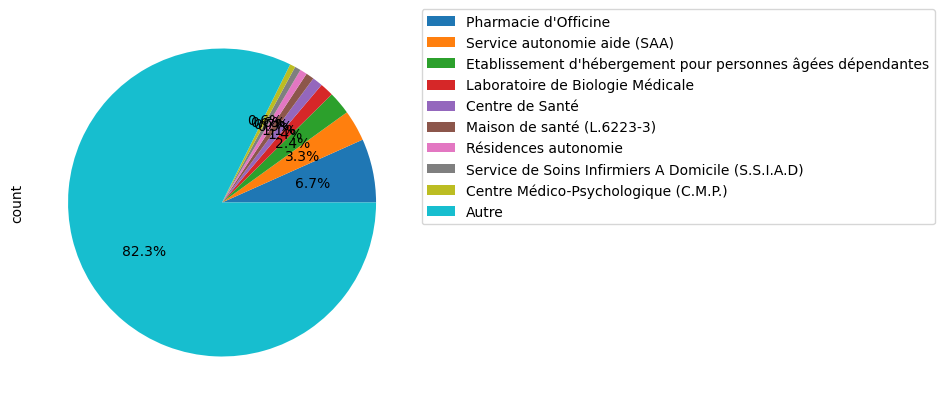

In [98]:
df_count_et = count_categories.iloc[:10]
df_count_et.loc[9] = ['Autre',count_categories['count'].iloc[10:].sum()]
df_count_et.set_index(df_count_et.columns[0], inplace=True)
ax = df_count_et.plot(kind='pie', y='count', figsize=(5, 5), labeldistance=None, autopct='%1.1f%%')
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
plt.show()

## Mesurer l'évolution
entre 2018 et 2024 du nombre d'établissements enregistrés dans le FINESS.